In [127]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import math

Обработчик введенных параметров распределения

In [128]:
def params_handler(vals, params):

    if (len(vals) != len(params)):
        print('Неверное количество параметров', '\n')
        return -1
        
    try:
        vals = list(map(float, vals))

    except:
        print('Неверный формат параметров', '\n')
        return -1

    for i in range(len(vals)):
        
        if params[i] == 'p':
            if vals[i] < 0 or vals[i] > 1:
                print('Недопустимое значение для вероятности', '\n')
                return -1

        elif params[i] != 'μ':
            if vals[i] <= 0:
                print('Недопустимое значение для положительной константы', '\n')
                return -1

    return vals

Обработчик введенных данных

In [129]:
def handler(val, infinum = None, supremum = None):

    try:
        res = int(val)

    except:
        print('Неверный формат данных', '\n')
        return -1

    if infinum != None and res < infinum:
        print('Значение вне допустимого диапазона', '\n')
        return -1

    if supremum != None and res > supremum:
        print('Значение вне допустимого диапазона', '\n')
        return -1

    return res    

Распределения и их параметры

In [130]:
distr = {'Равномерное':['a', 'b'], 'Биномиальное':['n', 'p'], 'Пуассона':['λ'], 'Геометрическое':['p'], 'Нормальное':['μ', 'σ\u00B2'], 'Экспоненциальное':['λ'], 'Гамма':['k', 'θ'], 'Коши':['θ', 'λ']}
lst = list(distr.keys())

Сгенерировать выборку

In [131]:
def get_linspace(xs):
    return np.linspace(min(xs), max(xs), 1000)

In [132]:
def get_range(xs):
    return list(range(min(xs), max(xs)))

In [133]:
def gen_sample(type, n, ps):
    
    if lst[type] == 'Равномерное':

        uniform = ss.uniform
        xs = uniform.rvs(size = n, loc = ps[0], scale = ps[1])
        xs1 = get_linspace(xs)
        
        return xs, uniform.mean(loc = ps[0], scale = ps[1]), uniform.var(loc = ps[0], scale = ps[1]), (xs1, uniform.pdf(xs1, loc = ps[0], scale = ps[1]))

    elif lst[type] == 'Биномиальное':

        binom = ss.binom
        xs = binom.rvs(n = int(ps[0]), p = ps[1], size = n)
        xs1 = get_range(xs)

        return xs, binom.mean(n = int(ps[0]), p = ps[1]), binom.var(n = int(ps[0]), p = ps[1]), (xs1, binom.pmf(xs1, n = int(ps[0]), p = ps[1]))

    elif lst[type] == 'Пуассона':

        poisson = ss.poisson
        xs = poisson.rvs(ps[0], size = n)
        xs1 = get_range(xs)

        return xs, poisson.mean(ps[0]), poisson.var(ps[0]), (xs1, poisson.pmf(xs1, ps[0]))

    elif lst[type] == 'Геометрическое':

        geom = ss.geom
        xs = geom(p = ps[0]).rvs(size = n)
        xs1 = get_range(xs)

        return xs, geom.mean(ps[0]), geom.var(ps[0]), (xs1, geom.pmf(xs1, ps[0]))

    elif lst[type] == 'Нормальное':

        norm = ss.norm
        xs = norm.rvs(loc = ps[0], scale = ps[1], size = n)
        xs1 = get_linspace(xs)

        return xs, norm.mean(loc = ps[0], scale = ps[1]), norm.var(loc = ps[0], scale = ps[1]), (xs1, norm.pdf(xs1, loc = ps[0], scale = ps[1]))

    elif lst[type] == 'Экспоненциальное':

        expon = ss.expon
        xs = expon.rvs(scale = ps[0], size = n)
        xs1 = get_linspace(xs)

        return xs, expon.mean(scale = ps[0]), expon.var(scale = ps[0]), (xs1, expon.pdf(xs1, scale = ps[0]))

    elif lst[type] == 'Гамма':

        gamma = ss.gamma
        xs = gamma.rvs(ps[0], scale = ps[1], size = n)
        xs1 = get_linspace(xs)

        return xs, gamma.mean(ps[0], scale = ps[1]), gamma.var(ps[0], scale = ps[1]), (xs1, gamma.pdf(xs1, ps[0], scale = ps[1]))

    elif lst[type] == 'Коши':

        cauchy = ss.cauchy
        xs = cauchy.rvs(loc = ps[0], scale = ps[1], size = n)
        xs1 = get_linspace(xs)

        return xs, cauchy.mean(loc = ps[0], scale = ps[1]), cauchy.var(loc = ps[0], scale = ps[1]), (xs1, cauchy.pdf(xs1, loc = ps[0], scale = ps[1]))

    return [], None, None

Гисторамма

In [134]:
def draw_histor(xs, ax, ps, vals, dens):
    
    ln = 0
    label = ''

    if ps is not None:
        
        ln = len(ps)

        for i in range(ln):
            label += ps[i] + ' = ' + str(vals[i])

            if i < ln - 1:
                label += ', '

    ax.plot(dens[0], dens[1], color = 'black', linewidth = 3)  
    sns.histplot(x = xs, stat = 'density', bins = 'sturges', color = 'blue', ax = ax, label = label)

    ax.set_ylabel('')
    if label:
        ax.legend()

Закон больших чисел

In [135]:
def draw_mean(xs, n, ax, mean):

    xs = sorted(xs)  
    sums = np.cumsum(xs)
      
    ys = [sums[k - 1] / k for k in range(1, n + 1)]

    ax.plot(xs, [mean for x in xs], label = 'Ex1')
    ax.plot(xs, ys, label = r'$\frac{X1+X2+..+Xn}{n}$')
    ax.legend()

Центральная предельная теорема

In [136]:
def get_CLT(sum, n, mean, var):
    return (sum - n * mean) / math.sqrt(n * var)

In [137]:
def draw_CLT(xs, n, ax, mean, var):

    xs = sorted(xs)
    sums = np.cumsum(xs)
      
    ys = [-get_CLT(sums[k - 1], k, mean, var) for k in range(1, n + 1)]

    ax.plot(xs, ys, label = r'$\frac{X1+X2+..+Xn-nEx1}{√nDx1}$')
    ax.legend()

ЦПТ для степеней 10

In [138]:
def draw_CLTs(ax, type, vals):

    for i in range(1, 6):

        num = 10 ** i
        xs, mean, var, _ = gen_sample(type, num, vals)
        xs = sorted(xs)
        sums = np.cumsum(xs)
      
        ys = [-get_CLT(sums[k - 1], k, mean, var) for k in range(1, num + 1)]

        ax.plot(xs, ys, label = 'n = 10^' + str(i))
           
    ax.legend()

Гистограмма стандартного нормального распределения

In [139]:
def draw_norm_histr(type, ax, n, vals):
    
    cnt = 1000
    ys = [0 for i in range(cnt)]

    for i in range(cnt):
        xs, mean, var, _ = gen_sample(type, n, vals)
        ys[i] = get_CLT(sum(xs), n, mean, var)

    dens = gen_sample(4, n, [0, 1])[3]
    
    ax.plot(dens[0], dens[1], color = 'black', linewidth = 3)
    sns.histplot(x = ys, stat = 'density', bins = 'sturges', color = 'blue', ax = ax, label = r'$\frac{X1,j+..+Xn,j-nEx1}{√nDx1}$')
    
    ax.set_ylabel('')
    ax.legend()

Main

Укажите номер распределения:
0 - Равномерное
1 - Биномиальное
2 - Пуассона
3 - Геометрическое
4 - Нормальное
5 - Экспоненциальное
6 - Гамма
7 - Коши


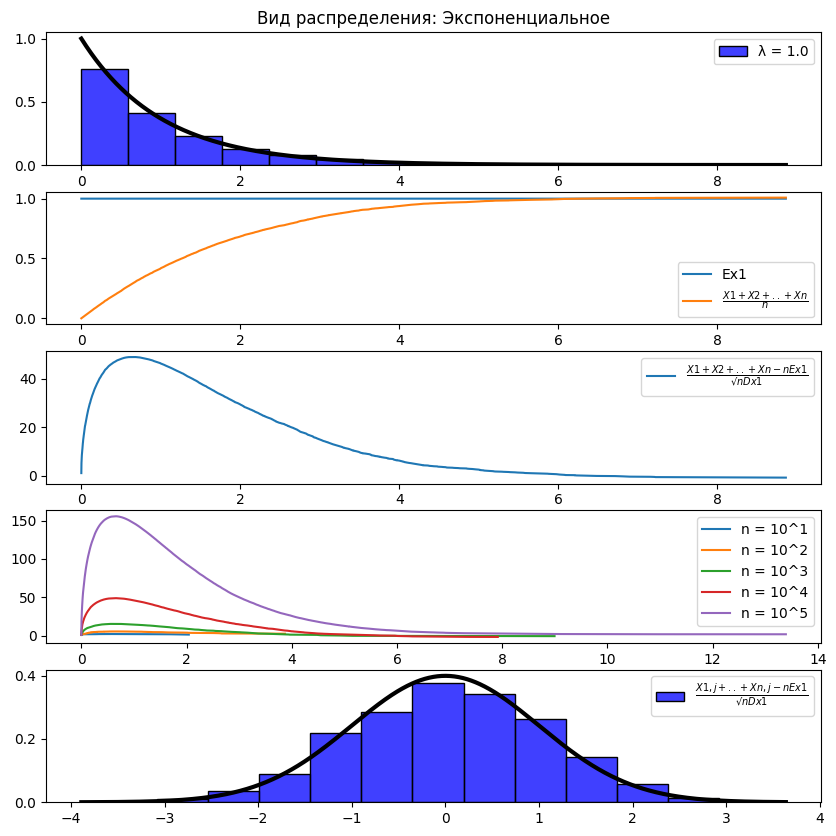

In [140]:
print('Укажите номер распределения:')

for i in range(len(lst)):
    print(i, '-', lst[i])

while True:

    type = handler(input('Номер:'), 0, len(lst) - 1)
    if type == -1:
        continue

    n = handler(input('Размер выборки:'), 0)
    if n == -1:
        continue

    vals = distr.get(lst[type])
    if len(vals) != 0:
        vals = params_handler(input('Введите параметры распределения ' + str(vals) + ': ').split(), vals)
        if vals == -1:
            continue 

    ax = plt.subplots(5, figsize=(10, 10))[1]
    xs, mean, var, dens = gen_sample(type, n, vals)
    
    ax[0].set_title('Вид распределения: ' + lst[type])

    draw_histor(xs, ax[0], distr.get(lst[type]), vals, dens)
    draw_mean(xs, n, ax[1], mean)
    draw_CLT(xs, n, ax[2], mean, var)
    draw_CLTs(ax[3], type, vals)
    draw_norm_histr(type, ax[4], n, vals)
    

    break